In [92]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [111]:
data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv", index_col="ID")

In [112]:
data.head(10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0


In [113]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [114]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [115]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [116]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [117]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [118]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [119]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [120]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [121]:
data[data['Experience'] < 0]['Experience'].count()

52

In [122]:
data[data['Mortgage'] == 0]['Mortgage'].count()

3462

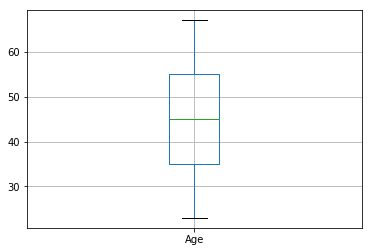

In [123]:
data.boxplot(column='Age')

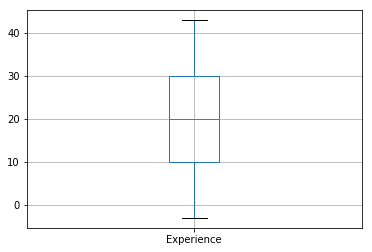

In [124]:
data.boxplot(column='Experience')

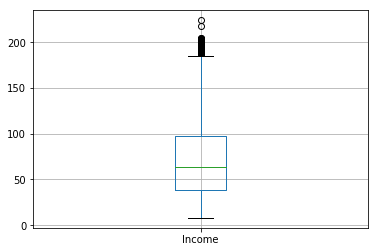

In [125]:
data.boxplot(column='Income')

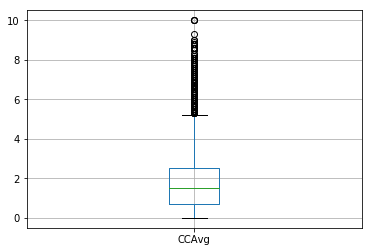

In [126]:
data.boxplot(column='CCAvg')

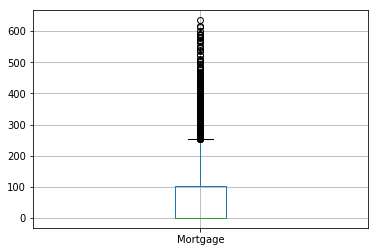

In [127]:
data.boxplot(column='Mortgage')

From the above calculations, the below observations can be made:

1) Number of customers who have opted for Personal Loan < 10%

2) Number of customers who have Securities Account and CD Account is <=10%

3) Number of Customers who have Credit Card is < 30%

4) More than 50% Customers are Online

5) Experience Column has 52 negative values (which is not possible). Hence replacing these values with 0.

6) Income column has outliers. But considering it is possible to have a few very high income customers not removing these outliers

7) CCAvg has outliers. But considering < 30% customers have credit cards, this distortion is possible. Hence not removing these outliers

8) Mortgage column has outliers. But considering 3462 customers dont have mortgage, this distortion is possible.Hence not removing these outliers

9) Zip Code column has 497 unique values. Not considering this column for analysis as more information is not available to group the zip codes region wise and analyse which would add more value rather than considering every zip code.

In [128]:
# Replacing negative Experience values with 0

data.Experience[data.Experience< 0] = 0

C:\Users\gopin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
# Predictor variables (Feature Dataset)

X = data.drop(['ZIP Code','Personal Loan'],axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,
1,25,1,49,4,1.6,1,0,1,0,0,0
2,45,19,34,3,1.5,1,0,1,0,0,0
3,39,15,11,1,1.0,1,0,0,0,0,0
4,35,9,100,1,2.7,2,0,0,0,0,0
5,35,8,45,4,1.0,2,0,0,0,0,1


In [130]:
Y = data[['Personal Loan']]
Y.head()

,Personal Loan
ID,
1,0
2,0
3,0
4,0
5,0


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [132]:
print(f'Shape of Training feature dataset, (X_train)  : {X_train.shape}')
print(f'Shape of Training target dataset,  (Y_train)  : {Y_train.shape}')
print(f'Shape of Testing feature dataset,  (X_test)   : {X_test.shape}')
print(f'Shape of Testing target dataset,   (Y_test)   : {Y_test.shape}')

Shape of Training feature dataset, (X_train)  : (3500, 11)
Shape of Training target dataset,  (Y_train)  : (3500, 1)
Shape of Testing feature dataset,  (X_test)   : (1500, 11)
Shape of Testing target dataset,   (Y_test)   : (1500, 1)


In [133]:
# Logistic Regression

model_L = LogisticRegression()
model_L.fit(X_train, Y_train)

C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [134]:
Y_predict = model_L.predict(X_test)
model_L_score = model_L.score(X_test, Y_test)
print(model_L_score)

0.946


In [135]:
# Confusion Matrix
print(metrics.confusion_matrix(Y_test, Y_predict))

[[1335   16]
 [  65   84]]


In [136]:
# KNN Classification

from scipy.stats import zscore

# convert the features into z scores

X_train_z = X_train.apply(zscore)  

X_test_z = X_test.apply(zscore)  

In [137]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [138]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train_z, Y_train)

C:\Users\gopin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [139]:
Y_predict_K = NNH.predict(X_test_z)
NNH.score(X_test_z, Y_test)

0.9533333333333334

In [140]:
# Confusion Matrix
print(metrics.confusion_matrix(Y_test, Y_predict_K))

[[1344    7]
 [  63   86]]


In [141]:
# Naive Bayes Classifier

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model_N = GaussianNB()
model_N.fit(X_train, Y_train)

C:\Users\gopin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [142]:
Y_predict_N= model_N.predict(X_test)
model_N.score(X_test_z, Y_test)

0.8946666666666667

In [143]:
# Confusion Matrix
print(metrics.confusion_matrix(Y_test, Y_predict_N))

[[1228  123]
 [  65   84]]


From the scores of all the three models, it can be seen that KNN has performed the best in this case. This is mostly because of the high number of categorical values in the feature dataset.